<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/Meta_Data_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This Notebook extracts various meta data features from the data. This is to be run for each file of train, test and validation in sepearte run to be faster.

Importing Data file

In [1]:
# Starting with meta data feature extractions
#Importing the file
import pandas as pd
#books = pd.read_csv("books_train.csv", index_col=0)
#books = pd.read_csv("books_validation.csv", index_col=0)
books = pd.read_csv("books_test.csv", index_col=0)
books.reset_index(inplace = True)
books.head(5)

,index,ID,data,genre
0,47,147,"""What is the book?""\n""According to the Japanes...",Ghost and Horror
1,95,195,A solitary fisher ploughed the lively blue of ...,Allegories
2,129,346,The scene was an actress's dressing-room at th...,Literary
3,63,163,"""And Mr. Joseph Walters is going to stay the n...",Ghost and Horror
4,459,347,"""George! Harry! - lazy fellows that you are! -...",Literary


In [2]:
"""del books['index']"""

"del books['index']"

In [3]:
books.head(5)

,index,ID,data,genre
0,47,147,"""What is the book?""\n""According to the Japanes...",Ghost and Horror
1,95,195,A solitary fisher ploughed the lively blue of ...,Allegories
2,129,346,The scene was an actress's dressing-room at th...,Literary
3,63,163,"""And Mr. Joseph Walters is going to stay the n...",Ghost and Horror
4,459,347,"""George! Harry! - lazy fellows that you are! -...",Literary


In [4]:
books.shape #check shape of the dataframe

(79, 4)

In [5]:
#Importing NLTK libariaries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
import numpy as np
# changing the data type of columns
books.data = books.data.astype(str)
#books.Author_Name = books.Author_Name.astype(str)
#books.Book_Name = books.Book_Name.astype(str)
books.genre = pd.Categorical(books.genre)

In [7]:
# can run if needs subset of books
"""
books = books[0:25]
from collections import Counter
print(Counter(books.genre))
"""

'\nbooks = books[0:25]\nfrom collections import Counter\nprint(Counter(books.genre))\n'

In [8]:
# books.genre.unique    check unqiue genres

This cleans the raw data, changes to lower case, removes and apostrtrophes are replaces y space, and any spaces are reduces to one. This worked  faster than those we implemneted hence used.

In [9]:
#This fucntion is taken from stackoverflow
def cleaning(var):
    """Take a string. Returns a string with only lowercase letters and the space between words."""
    plain_string = ""
    for x in var:
        x = x.lower()
        if (('a' <= x and x <= 'z') or x == ' '):
            plain_string += x
        elif x == '\'':  # any apostrophes(') are replaced by a space
            plain_string += ' '
    while '  ' in plain_string:  # any multiple spaces are replaced by a single space
        plain_string = plain_string.replace('  ', ' ')
    return plain_string


Defining Functions for tokenising sentence/words/charcters using nltk

In [10]:
import nltk
from nltk import sent_tokenize, word_tokenize, FreqDist
def token_sentence(text):
    sentences = nltk.Text(sent_tokenize(text)) #sentence token
    return len(sentences) # returns total number of sentences after tokeinsing on passes text

In [11]:
def token_word(text):
    words = nltk.Text(word_tokenize(((text)))) #word token
    return len(words) #returns total number of words after tokeinsing on passed text

In [12]:
def cal_len(text):
    #gives lenght of string passes
    return len(text)

In [13]:
# copying the dataframe to new 
new_books = books.copy()
new_books

,index,ID,data,genre
0,47,147,"""What is the book?""\n""According to the Japanes...",Ghost and Horror
1,95,195,A solitary fisher ploughed the lively blue of ...,Allegories
2,129,346,The scene was an actress's dressing-room at th...,Literary
3,63,163,"""And Mr. Joseph Walters is going to stay the n...",Ghost and Horror
4,459,347,"""George! Harry! - lazy fellows that you are! -...",Literary
...,...,...,...,...
74,42,142,HOW I come not to have a last name is a questi...,Humorous and Wit and Satire
75,37,137,E-text prepared by Robin Eugene Escovado\nAn O...,Love and Romance
76,201,301,Moistening the tip of his immaculate handkerch...,Humorous and Wit and Satire
77,11,111,"A Splendid Chance for ""SECRET SERVICE"" Readers...",Detective and Mystery


Calculating average lenght of a book, avg number of sentences and words in a book

In [14]:
# total lenght of each book
new_books['book_lenght'] = new_books['data'].apply(len)

#total lenght of all the books
total_lenght = new_books['book_lenght'].sum() #stored in a variable

#total sentences in each of the book
new_books['book_sen'] =  new_books['data'].apply(token_sentence)

#total sentence lenght in all the books
total_sen = new_books['book_sen'].sum() #stored in a variable

#total words in each of the book
new_books['book_word'] =  new_books['data'].apply(token_word)

#total words in all the books
total_words = new_books['book_word'].sum() #stored in a variable

In [15]:
# Average Book lenght
def lenght_book(text): 
    return len(text)/total_lenght

In [16]:
#Average number of sentences in a book
def number_sen(text):
    return token_sentence(text)/total_sen

In [17]:
#Average number of words in a book
def number_word(text):
    return token_word(text)/total_words

In [18]:
# Total words
def tot_word(text):
  words = nltk.Text(word_tokenize(((text))))
  return len(words)

how many stop words in a book out of total number of words

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words("english")) #using nltk stop_words only not additional
def number_of_stop_words(text):
    tokens_of_words = word_tokenize(text) #using nltk
    get_stop_words = [word for word in tokens_of_words if word in stop_words]
    len_of_get_stop_words = len(get_stop_words) #number of stop_words
    len_of_total_words = len(tokens_of_words) #number of total words
    ratio = len_of_get_stop_words/len_of_total_words
    return ratio

How many Nouns in a book . Assumption is literay would have more nouns , romace shall have lower.it can corresponde to the number of charcters also.

In [20]:
def get_number_of_nouns(text):
    list_of_nouns = []
    list_of_verbs = []
    list_of_adjectives = []
    list_of_numbers = []
    list_of_puch = []
    list_of_proper_nouns=[]
    for i in nltk.pos_tag(word_tokenize(text)):
        if i[1][0:2] == 'NN': # all noun tags start with NN
          list_of_nouns.append(i)
        elif i[1][0:2] == 'VB':
          list_of_verbs.append(i)
        elif i[1][0:2] == 'JJ':
          list_of_adjectives.append(i)
        elif i[1][0:3] == 'NNP':
          list_of_proper_nouns.append(i)
        elif i[1][0:2] == 'CD': #cardinal numbers
          list_of_numbers.append(i)
        elif i[1][0:2] == '.': #number of puctuations
          list_of_puch.append(i)
    return len(list_of_nouns)/tot_word(text), len(list_of_verbs)/tot_word(text), len(list_of_adjectives)/tot_word(text), len(list_of_proper_nouns)/tot_word(text), len(list_of_numbers)/tot_word(text),len(list_of_puch)/tot_word(text)

How many foreign language words in a book since its english book, number of other language words can tell about different writing styles.

In [21]:
def number_of_foreignwords(text):
    list_of_f_words = []
    for i in nltk.pos_tag(word_tokenize(text)):
        if i[1][0:2] == 'FW': # all adjective tags start with FW
            list_of_f_words.append(i)
    return len(list_of_f_words)/tot_word(text)

Some meta data charcterstics of pucuations can help identify genre writing styles. 

In [22]:
#How many perdiods
def number_of_point(text):
    count_period =0
    count_comma =0
    count_colon=0
    count_semi_colon=0
    count_exl=0
    count_q=0
    for x in text:
        if x == '.':
            count_period += 1
        elif x == ',':
          count_comma +=1
        elif x == ':':
          count_colon +=1
        elif x == ';':
          count_semi_colon +=1
        elif x == '!':
          count_exl +=1
        elif x == '?':
          count_q +=1
    return count_period/tot_word(text) ,count_comma/tot_word(text),count_colon/tot_word(text), count_semi_colon/tot_word(text), count_exl/tot_word(text), count_q/tot_word(text)

Checking dialouge breaks 

In [23]:
def count_dial_break(text):
    # may be romantic novels shall have converations, its to dentify the style of writing, allogories shall have long dialouges too
    return text.count(", \"")

Feminin words, musculian words because romantic novels shall have more of them but western /detective stories shall have less of them

In [24]:
def count_gender_words_ratio(text):
    she_words = 'she her woman herself girl women lady queen princess daughter madam madame wife'.split()
    he_words = 'he his man mr himself boy men gentleman gentlemen king prince son sir husband'.split()
    she_count = 0
    he_count = 0
    text = cleaning(text) #calling cleaning fucntion
    for w in text.split():
        if w in she_words:
            she_count += 1
        elif w in he_words:
            he_count +=1
    if she_count and not he_count:
      she_to_he_ratio =1
    elif not she_count and not he_count:
      she_to_he_ratio =0
    else:
      she_to_he_ratio = she_count/he_count
    return she_count, he_count , she_to_he_ratio

Putting all features ectarcted inot single dataframe

In [25]:
list_of_meta_features = [
    lenght_book 
    ,number_sen 
    ,number_word 
    ,number_of_stop_words 
     ,get_number_of_nouns
    ,number_of_foreignwords
    ,number_of_point
    ,count_dial_break
    ,count_gender_words_ratio 
    ]

df_meta = new_books.copy()

for i in list_of_meta_features:
        df_meta[i.__name__] = df_meta.data.apply(i)

df_meta[['noun', 'verb', 'adj', 'ProperNoun', 'num', 'Puch']] = pd.DataFrame(df_meta['get_number_of_nouns'].tolist(), index=df_meta.index)


In [26]:
df_meta[['she', 'he', 'she_he_ratio']] = pd.DataFrame(df_meta['count_gender_words_ratio'].tolist(), index=df_meta.index)
df_meta[['period' ,'comma','colon', 'semi_colon', 'exl', 'q']] = pd.DataFrame(df_meta['number_of_point'].tolist(), index=df_meta.index)
del df_meta['get_number_of_nouns']
del df_meta['count_gender_words_ratio']
del df_meta['number_of_point']
del df_meta['data']
"""del df_meta['Author_Name']
del df_meta['Book_Name']"""
#df_meta.reset_index(inplace=True)
df_meta.head(5)


,index,ID,genre,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q
0,47,147,Ghost and Horror,374778,3490,76901,0.013736,0.010910,0.012834,0.380684,0.000078,66,0.187306,0.137605,0.079700,0.0,0.002900,0.045396,891,2482,0.358985,0.043628,0.076696,0.000156,0.004226,0.001521,0.002640
1,95,195,Allegories,337103,4179,73579,0.012355,0.013064,0.012280,0.372824,0.000068,9,0.186154,0.154637,0.064529,0.0,0.005654,0.056796,1722,2433,0.707768,0.045706,0.068702,0.003262,0.010492,0.005654,0.005654
2,129,346,Literary,276183,3315,59470,0.010122,0.010363,0.009925,0.382865,0.001110,74,0.188902,0.157575,0.055221,0.0,0.005633,0.055978,1770,1434,1.234310,0.048058,0.069581,0.004254,0.004271,0.004204,0.005078
3,63,163,Ghost and Horror,316109,2375,68049,0.011586,0.007425,0.011357,0.410351,0.000220,118,0.187086,0.156461,0.061735,0.0,0.005393,0.034901,177,1558,0.113607,0.034196,0.067819,0.000529,0.009934,0.000500,0.002645
4,459,347,Literary,216043,1302,45070,0.007918,0.004070,0.007522,0.424118,0.000067,97,0.196783,0.154582,0.061149,0.0,0.003927,0.028888,160,2131,0.075082,0.023208,0.072310,0.003128,0.014733,0.003772,0.002086


In [27]:
#df_meta.to_csv("df_meta_train.csv")
#df_meta.to_csv("df_meta_validation.csv")
df_meta.to_csv("df_meta_test.csv")

In [28]:
df_meta.head(5)

,index,ID,genre,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q
0,47,147,Ghost and Horror,374778,3490,76901,0.013736,0.010910,0.012834,0.380684,0.000078,66,0.187306,0.137605,0.079700,0.0,0.002900,0.045396,891,2482,0.358985,0.043628,0.076696,0.000156,0.004226,0.001521,0.002640
1,95,195,Allegories,337103,4179,73579,0.012355,0.013064,0.012280,0.372824,0.000068,9,0.186154,0.154637,0.064529,0.0,0.005654,0.056796,1722,2433,0.707768,0.045706,0.068702,0.003262,0.010492,0.005654,0.005654
2,129,346,Literary,276183,3315,59470,0.010122,0.010363,0.009925,0.382865,0.001110,74,0.188902,0.157575,0.055221,0.0,0.005633,0.055978,1770,1434,1.234310,0.048058,0.069581,0.004254,0.004271,0.004204,0.005078
3,63,163,Ghost and Horror,316109,2375,68049,0.011586,0.007425,0.011357,0.410351,0.000220,118,0.187086,0.156461,0.061735,0.0,0.005393,0.034901,177,1558,0.113607,0.034196,0.067819,0.000529,0.009934,0.000500,0.002645
4,459,347,Literary,216043,1302,45070,0.007918,0.004070,0.007522,0.424118,0.000067,97,0.196783,0.154582,0.061149,0.0,0.003927,0.028888,160,2131,0.075082,0.023208,0.072310,0.003128,0.014733,0.003772,0.002086


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


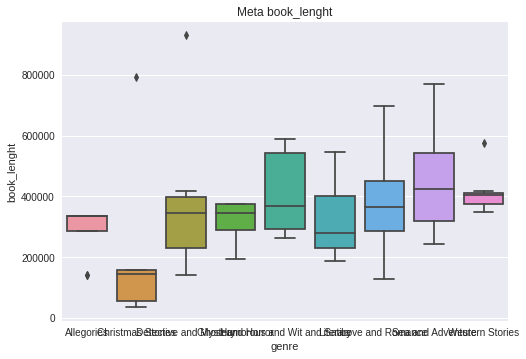

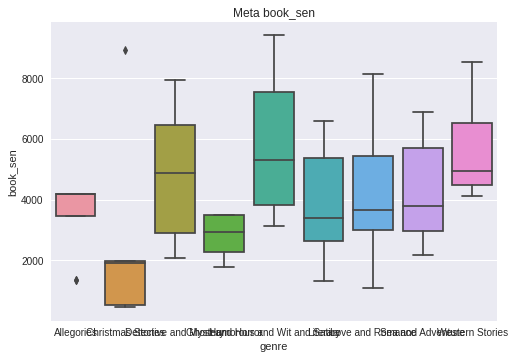

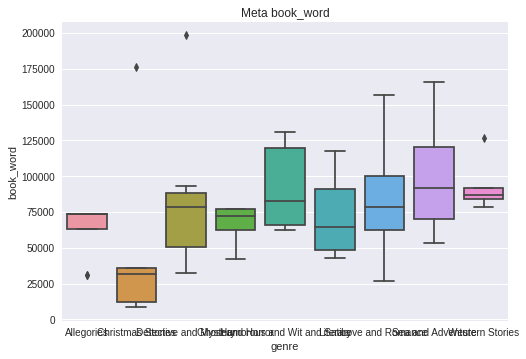

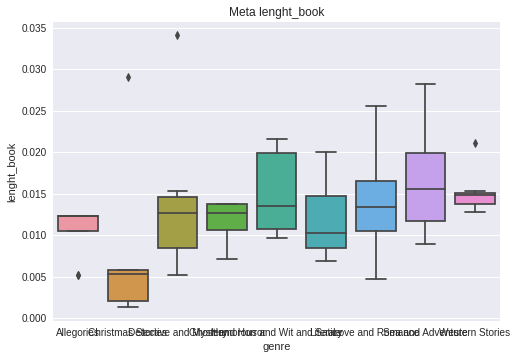

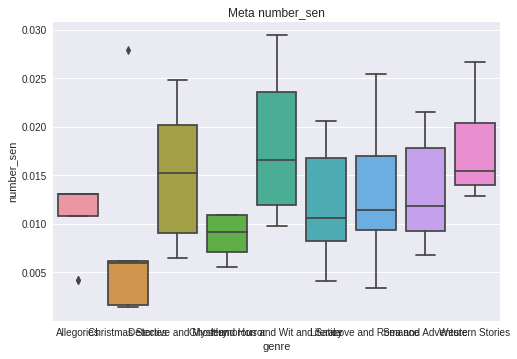

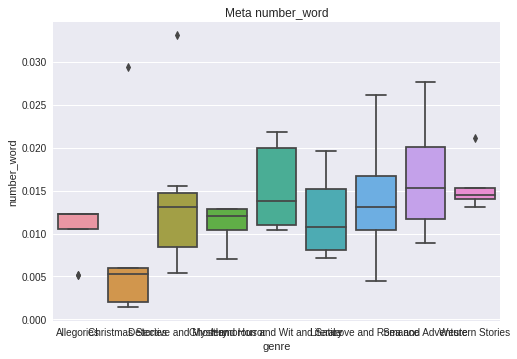

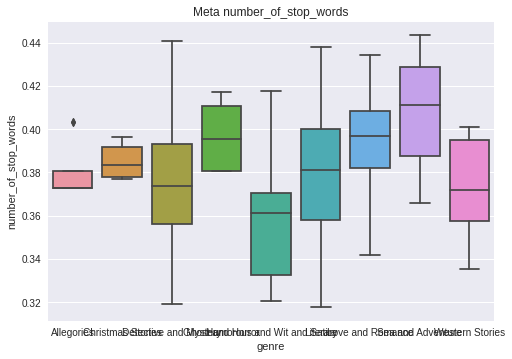

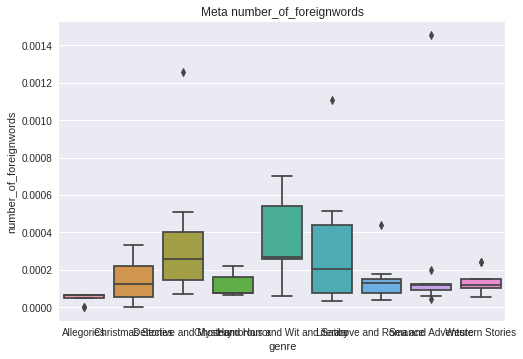

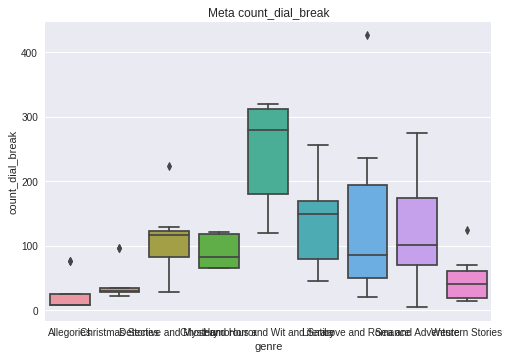

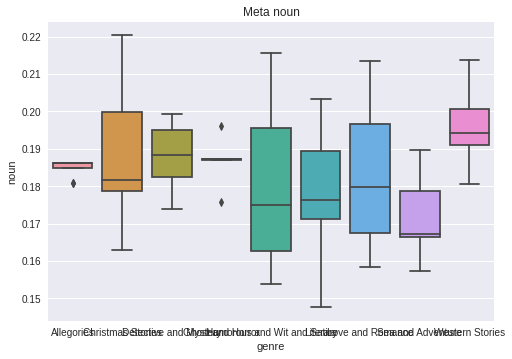

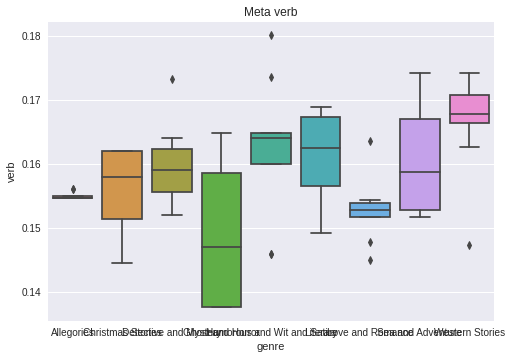

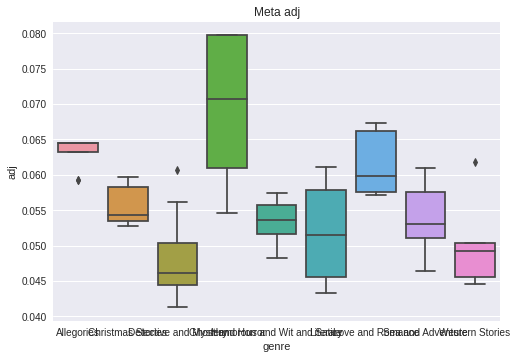

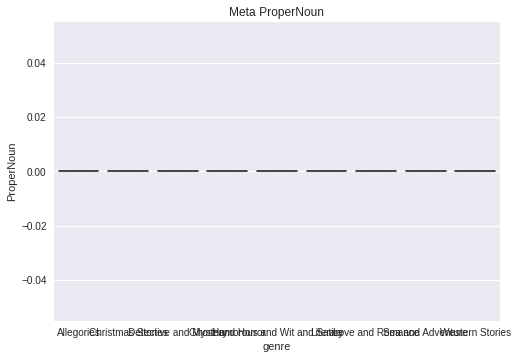

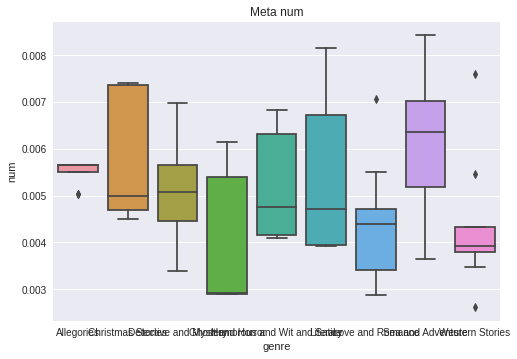

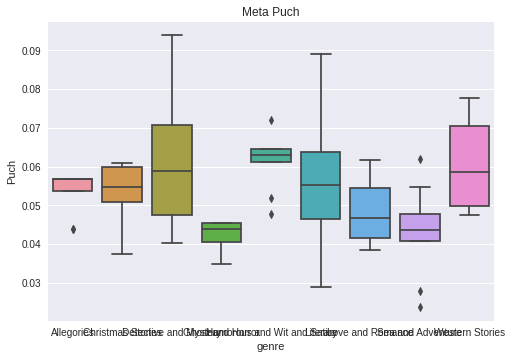

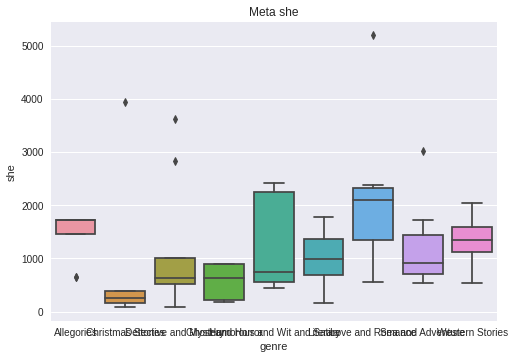

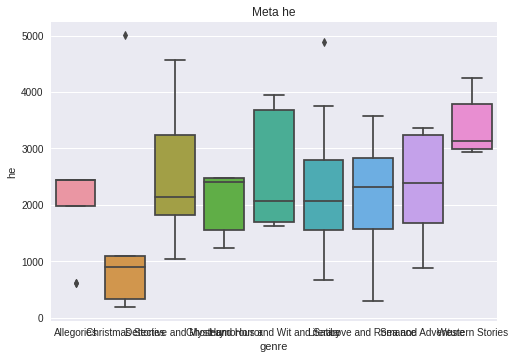

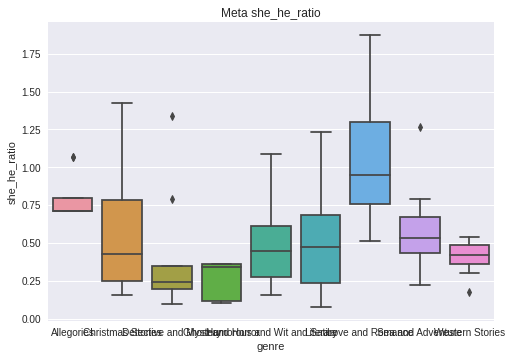

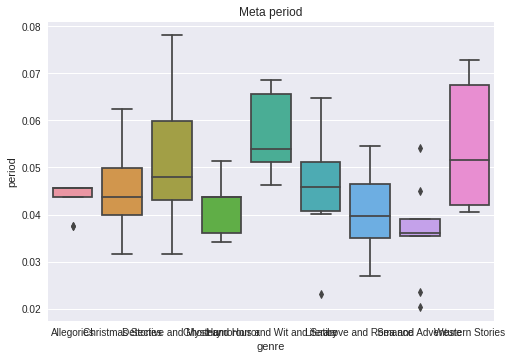

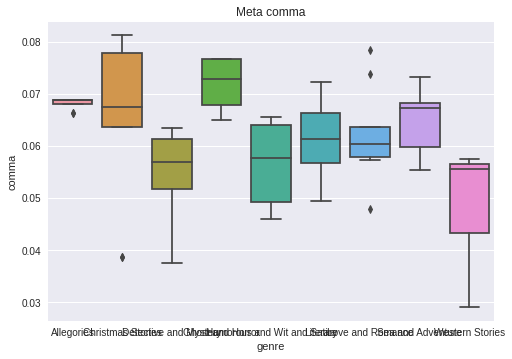

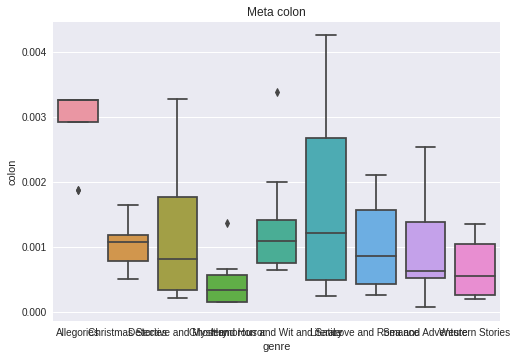

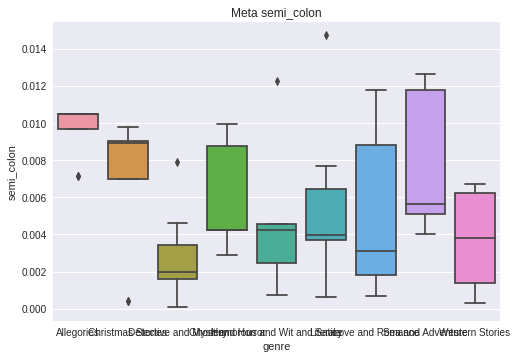

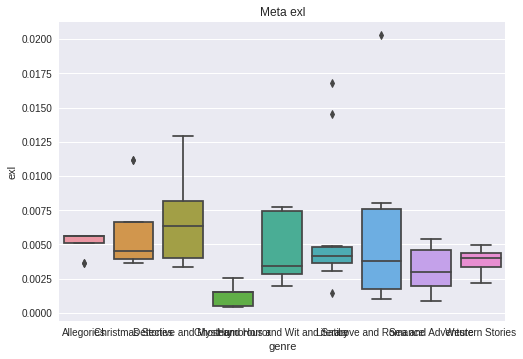

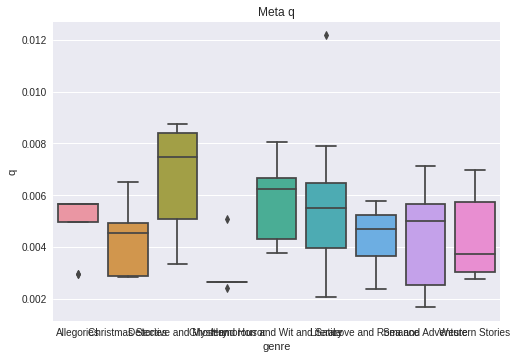

In [29]:
# ploting the features
import matplotlib.pyplot as plt
import seaborn as sns

for cols in df_meta.columns[3:]:
    plt.style.use('seaborn')
    sns.boxplot(x='genre', y=cols, data=df_meta)
    plt.title('Meta {}'.format(cols))
    plt.savefig('Meta {}'.format(cols))
    plt.show()